##Definitions

*Covariance*

Definition: Tells whether two variables move in the same or opposite direction.

Real-world example: Study hours vs exam marks.

*Correlation*

Definition: Standardized version of covariance (ranges from –1 to +1).

Easy to interpret, unitless.

*Pearson’s r*

Measures linear relationship.

Range: –1 (perfect negative), 0 (no relation), +1 (perfect positive).

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [ ]:
# Load built-in Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)


In [ ]:
# Add target column
df['target'] = iris.target

In [ ]:
# Show the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


It contains information about 3 types of flowers:

Setosa

Versicolor

Virginica

Each flower is described by 4 measurements

The dataset has 3 types of Iris flowers:

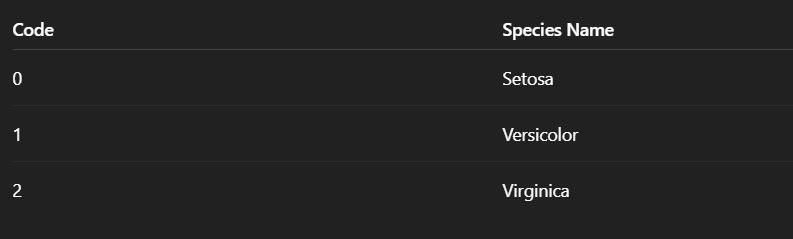

In [ ]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
74,6.4,2.9,4.3,1.3,1
147,6.5,3.0,5.2,2.0,2
61,5.9,3.0,4.2,1.5,1
58,6.6,2.9,4.6,1.3,1
66,5.6,3.0,4.5,1.5,1


In [ ]:
# Covariance matrix
print("\nCovariance Matrix:")
cov_matrix = df.cov()
display(cov_matrix)


Covariance Matrix:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),0.685694,-0.042434,1.274315,0.516271,0.530872
sepal width (cm),-0.042434,0.189979,-0.329656,-0.121639,-0.152349
petal length (cm),1.274315,-0.329656,3.116278,1.295609,1.372483
petal width (cm),0.516271,-0.121639,1.295609,0.581006,0.597315
target,0.530872,-0.152349,1.372483,0.597315,0.671141


This means:

Petal Length has the strongest connection with the flower species.

Sepal Width has a very weak or negative connection.

So if you're trying to predict the species, Petal Length is the most helpful!

In [ ]:
# Correlation matrix
print("\nCorrelation Matrix:")
corr_matrix = df.corr()
display(corr_matrix)


Correlation Matrix:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


Best Predictors of flower species = Petal Length and Petal Width

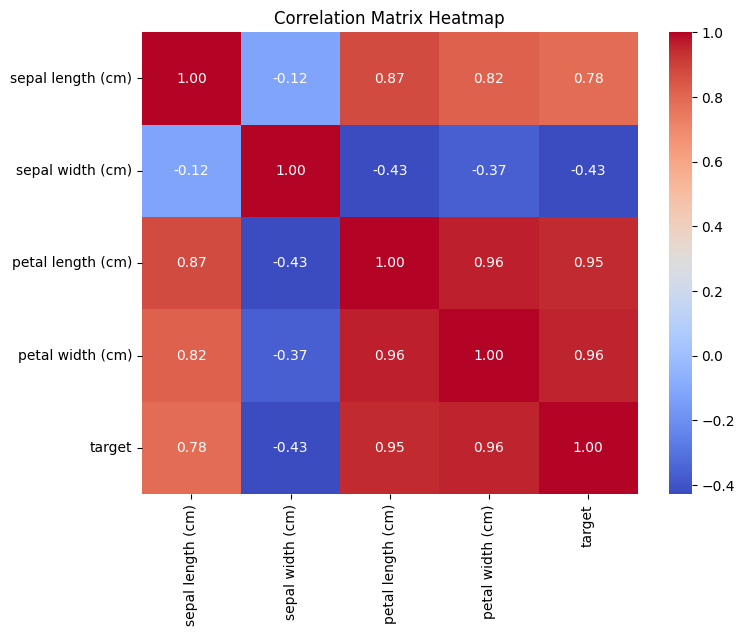

In [ ]:
# Visualize Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

📊 Imagine correlation like this:

+1 → Both variables go up together (like height and weight)

–1 → One goes up, the other goes down (like speed and travel time)

0 → No relation at all (like shoe size and math score)

In [ ]:
# Pearson's r between sepal length and petal length
from scipy.stats import pearsonr

x = df['sepal length (cm)']
y = df['petal length (cm)']

r, p_value = pearsonr(x, y)

print(f"\nPearson's r between Sepal Length and Petal Length: {r:.3f}")
print(f"P-value: {p_value:.4f}")

if r > 0.7:
    print("👉 Strong positive correlation")
elif r > 0.3:
    print("👉 Moderate positive correlation")
elif r > 0:
    print("👉 Weak positive correlation")
else:
    print("👉 No or negative correlation")



Pearson's r between Sepal Length and Petal Length: 0.872
P-value: 0.0000
👉 Strong positive correlation


✅ Interpretation of 0.872
This is a strong positive correlation.

It means:

As sepal length increases, petal length also tends to increase — and they follow a fairly consistent pattern.

<br><br>

📌 *P-value = 0.0000*

🧠 What is a P-value?
The p-value tells us if the correlation we see is statistically significant or just happened by chance.

🔍 A small p-value (usually < 0.05) means the correlation is real, not random.

✅ Interpretation of 0.0000
This p-value is very close to 0.

So, we’re very confident that the strong relationship between sepal length and petal length is statistically significant.

## 📘 Tasks

--View Covariance

Run the code and observe the covariance matrix.

Q1: Which two features have the highest positive covariance?

--View Correlation

Look at the correlation matrix heatmap.

Q2: Find two features that are strongly positively correlated (above 0.7).

Q3: Find any features that are weakly or negatively correlated.

--Use Pearson's r

Pearson's r is calculated between Sepal Length and Petal Length.

Q4: Change the code to compute Pearson’s r between:

Petal Width and Sepal Width

##Today's Lesson

What is Hypothesis Testing?

Hypothesis testing is a way to check if a claim about a population is likely to be true, based on sample data.

🧠 Example:

“Do two flower species have the same average petal length?”

We’ll test this using sample data from the Iris dataset.

##Null vs. Alternative Hypothesis


1. Null Hypothesis (H₀)
There’s no difference or no effect
The average petal length of setosa = versicolor

2. Alternative Hypothesis (H₁)

	There is a difference or effect
  The average petal length of setosa ≠ versicolor

## Confidence Intervals (CIs)
A confidence interval gives a range of values that we’re fairly sure contains the true population value.

Example:
"We are 95% confident that the true difference in means is between 1.0 and 1.5 cm."

✅ Good for interpreting the size of the effect

✅ If the CI does not include 0, it supports rejecting H₀

In [ ]:
from scipy.stats import ttest_ind
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

In [ ]:
# Compare petal length of Setosa and Versicolor
setosa = df[df['species'] == 'setosa']['petal length (cm)']
versicolor = df[df['species'] == 'versicolor']['petal length (cm)']

In [ ]:
# Run independent t-test
t_stat, p_val = ttest_ind(setosa, versicolor)

In [ ]:
# Display results
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_val:.4f}")

t-statistic: -39.4927
p-value: 0.0000


🧠 What do these mean?

🔹 1. t-statistic = -39.49

This is the value of the test statistic.

It tells us how different the two group means are, relative to the variation in the data.

A large value (positive or negative) means the groups are very different.

The negative sign just shows direction (Setosa's mean < Versicolor's mean).

💡 Big takeaway:

The difference between Setosa and Versicolor's petal lengths is huge compared to the random noise.

🔹 2. p-value = 0.0000

This value is almost zero.

It means:

“If the two species had the same average petal length, there’s almost a 0% chance we would see a difference this big just by random chance.”

✅ So we reject the null hypothesis.

✅ There is a significant difference between the petal lengths of Setosa and Versicolor.




“We ran a test to check if Setosa and Versicolor flowers have the same petal length.

Our results say: NO, their petal lengths are definitely different, and we’re super confident about this (p = 0.0000).”

In [ ]:
# Calculate Confidence Interval

import scipy.stats as stats

# Sample means and standard deviations
mean1 = np.mean(setosa)
mean2 = np.mean(versicolor)
std1 = np.std(setosa, ddof=1)
std2 = np.std(versicolor, ddof=1)
n1 = len(setosa)
n2 = len(versicolor)

# Standard Error
se = np.sqrt((std1**2)/n1 + (std2**2)/n2)

# t critical value for 95% CI and approximate degrees of freedom
df = n1 + n2 - 2
t_crit = stats.t.ppf(0.975, df)

# Confidence Interval
mean_diff = mean1 - mean2
ci_low = mean_diff - t_crit * se
ci_high = mean_diff + t_crit * se

print(f"95% Confidence Interval for the difference: [{ci_low:.2f}, {ci_high:.2f}]")



95% Confidence Interval for the difference: [-2.94, -2.66]


If the interval had included 0 (like [-0.5, 1.2]), then we couldn’t say there was a real difference. But since both values are negative and far from 0, it shows Setosa has much shorter petals than Versicolor.

🧪 Why is this important?

This confidence interval does not include 0

➤ That means there’s definitely a difference between the two species.

It supports what we saw in the p-value (0.0000) and t-statistic (-39.49)

➤ The two groups are statistically different.

## ✍️ Tasks:

--Compare Setosa vs Virginica:

Use the same ttest_ind code but change the species.

Interpret the p-value.

--Compare Sepal Width instead of Petal Length for Setosa vs Versicolor:

Do they have a big difference or not?

--Try manually calculating:

The mean of both groups.

Plot a boxplot using seaborn for visual comparison.